### Unsupervised learning and Preprocessing

Unsupervised learning subsumes all kind of machine learning where there is no known output, no teacher to instruct the learning algorithm.
i.e., in an unsupervised learning environment, the algorithm is just shown the input data and asked to extract knowledge from this data.

##### Unsupervised - Introduction

* Transformations of the dataset
    - Here a new representation of data which might be easier for humans or other ML algorithms to understand when compared to the original representation of data.
    - A common application is the `dimensionality reduction` which takes a high-dimensional data consisting of many features and finds a new way to represent with fewer features.
    - Most commonly, we reduce higher dimensions to 2D for better visualizations.
    - Another application is finding the parts or components that "make up" the data.
    - Example, topic extraction on collections of text document.

* Clustering 
    - Partitions the data into distinct groups of similar items.
    - A typical example is a social media account of a person.
    - This segregates all the available photos in the account and groups the picture based on its similarity.

* Challenges
    - A major challenge is whether an unsupervised ML model learned something useful while its journey.
    - As the name suggest, we don't know the exact output and hence we can't say the model "did well".
    - Because of this nature, these models are often used in exploratory setting, preprocessing setup for supervised learning algorithms.
    - Learning a new representation of the data can sometime lead to a better accuracy of the supervised algorithms or lesser memory and time consumption.
    - Even though preprocessing and scaling methods are often used in tandem with supervised models, scaling methods don't make use of supervised information, making them unsupervised.
    
* Preprocessing and Scaling
    - Earlier in Supervised models, we saw Neural Networks and SVMs (Support Vector Machine) are very sensitive to scaling of the data.
    - Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms.
    - Often this is a simple per-feature rescaling and shift of the data
    
Below is a simple example.
    

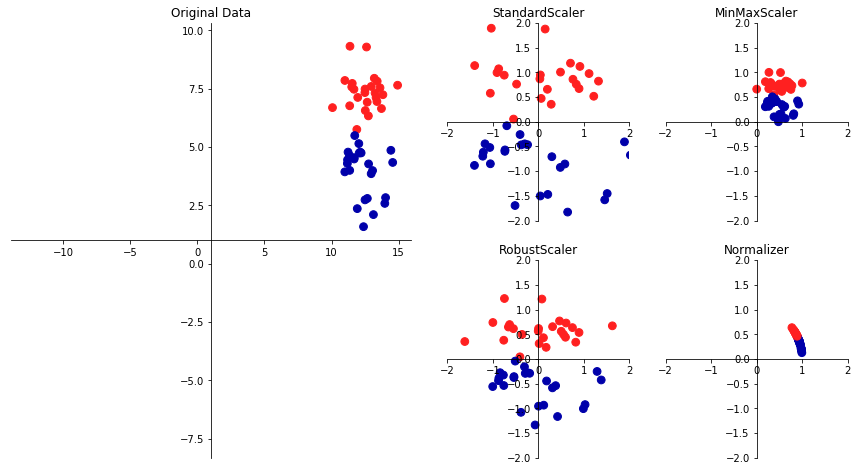

In [2]:
import mglearn
mglearn.plots.plot_scaling()

##### Different kinds of pre-processing

* The first plot above show a 2 class classification dataset with X-axis values ranging from 10 to 15 and 1 to 9 for Y-axis.
* The 4 plots on the right side shows 4 different ways to transform the data that yield more standard ranges.
* The `StandardScaler` in `scikit-learn` ensures that for each feature the _mean_ is 0 and _variance_ is 1, which brings all the features to the same magnitude.
* The `RobustScaler` works similar to the above scaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale. But it uses the _median_ and _quartiles_ instead of mean and variance. This makes it to ignore data points that are very different from the rest (like measurement errors) or _*outliers*_ and can lead to trouble for other scaling techniques.
* The `MinMaxScaler`, shifts the data such that all the features are exactly between 0 and 1. 
* The `Normalizer` does a very different kind of scaling. It scales each data point such that the feature vector has a Eucliden length of 1. Or it projects a data point on the circle (or sphere in case of higher dimensions) with a radius of 1. This is used mostly when direction of the data point is important, not the length.

##### Applying Data Transformations

* We will use `cancer` dataset and then apply `SVC (Kernel SVM)` and use the `MinMaxScaler` for preprocessing the data.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 1)
print (X_train.shape)
print (X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


* Now, we will use the fit() method for this scaler with based only on X_train data and not y_train data.
* This fit() method will compute the minimum and maximum value of each feature on the training set.

**Later**

To apply the transformation to `scale` the training data, we use the `transform` method of scaler.

In [7]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
# transform data
X_train_scaled = scaler.transform(X_train)

#print dataset properties before and after scaling
print ("Transformed shape : {}".format(X_train_scaled.shape))
print ("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print ("per-feature minimum before scaling:\n{}".format(X_train.max(axis=0)))
print ("per-feature minimum after scaling:\n{}".format(
    X_train_scaled.min(axis=0)))
print ("per-feature minimum after scaling:\n{}".format(
    X_train_scaled.max(axis=0)))

Transformed shape : (426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature minimum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature minimum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


* Similarly for test dataset

In [9]:
X_test_scaled = scaler.transform(X_test)
print ("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print ("per-feature minimum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature minimum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


* As we can see from the above methods, the min and max are not 0 and 1. Some are even having values outside of 0 and 1.
* This is because the `MinMaxScaler` method always applies exactly the same transformation to training and test dataset.
* That means, the `transform` method always subtracts the train minimum and divides by the train range, which might be different for testing values.

##### Scaling Training and Test data in same way

* It is important to apply the same transformation to both the train and test dataset for supervised model to work on test set.
* The following example illustrates what would happen if we were to use the minimum and range of the test set instead:


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

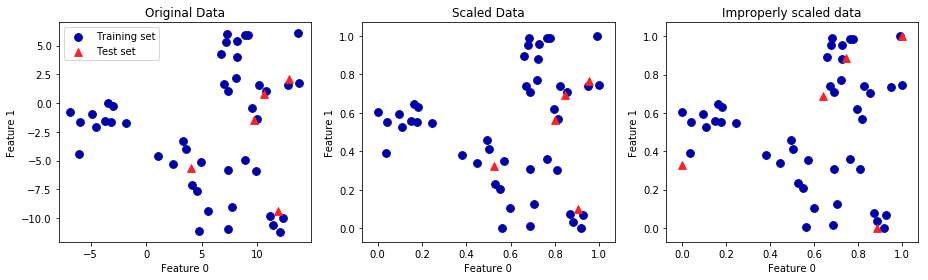

In [5]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

#splitting the train and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

#plot the train and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0],X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1),label="Test set", s=60)
axes[0].legend(loc = 'upper left')
axes[0].set_title("Original Data")

#scale the input data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Visualize the properly scaled data 
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#rescale the test data set separately
# ==> so test set min is 0 and test set max is 1
## This is only for illustration purpose. DO NOT DO THIS!!

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)

X_test_scaled_badly = test_scaler.transform(X_test)

#visualie the wrongly scaled "test" data

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                c=mglearn.cm2(1), label= "test set", s=60)
axes[2].set_title("Improperly scaled data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()


From the above figure we could see,

* The figure 1,
    - Is an unscaled 2D dataset, with the training set shown as circles and test set shown as triangles.

* The second figure, 
    - Is the same as first one. 
    - Scaled using `MinMaxScaler` method for scaling.
    - We used both `fit` and `transform` method for obtaining this transformation.
    - We can see though this is same as figure 1, the axes are changed (scaled down and the values are between 0 and 1)
    - We could also see the Min and Max values of **test set** is not 0 and 1 respectively.

* The third figure,
    - This shows the reality when train and test sets are separately scaled.
    - Here, for both train and test set, the min and max values are between 0 and 1.
    - Hence, the dataset is not correct.

##### Shortcuts and Efficient Alternativeness

- Often, you want to fit a model on some dataset, and then transform it. 
- This is a very common task, which can often be computed more efficiently than by simply calling fit() and transform() method.
- So, all models that have a transform method also has a fit() method.
- We could cut it short to `fit_transform()`
- An example of `StandardScaler` scaling method.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# via method chaining, regular way
X_scaled = scaler.fit(X_train).transform(X_train)

# same result, but more efficient way
X_scaled_d = scaler.fit_transform(X_train)


While `fit_transform` is not necessarily more efficient for all models, it is still good practice use this method when trying to transform the training set.

##### The Effect of Preprocessing and Supervised Learning

Now in the cancer dataset, the effect of `MinMaxScaler` on learning the SVC (quite different way of doing the same scaling we did earlier).
First, lets fit the SVC on the original data again for computation.

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100, gamma = 'auto')
svm.fit(X_train, y_train)

print ("Support Vector Machine Accuracy : {:.2f}".format(svm.score(X_test, y_test)))

Support Vector Machine Accuracy : 0.63


Now, the same effect by `MinMaxScaler` scaling

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#learning on the SVM on the scaled trained data
svm.fit(X_train_scaled, y_train)

#scoring
print ("Score of the scaled test set : {:.2f}".format(svm.score(X_test_scaled, y_test)))


Score of the scaled test set : 0.97


Comparing the above accuracy scores,
- The effect of scaling the data is quite significant.
- Eventhough its not complicated math, it is a good practice to use the scaling mechanisms provided by `scikit-learn` instead of reimplementing them yourself.
- You can easily replace one preprocessing algorithm with another by changing the class you use.
- As all of the preprocessing classes have the same interface, consisting of fit and transform method.

In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning on SVM on the scaled training
svm.fit(X_train_scaled, y_train)

#scoring
print ("SVM Test accuracy : {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM Test accuracy : 0.96


Now as we have seen the effect of transformation on a simple data set for preprocessing, lets move on to more interesting transformations using unsupervised learning.

### Dimensionality Reduction, Feature Extraction and Manifold Learning

- We now know, transforming data using unsupervised learning can have many motivations.
- Mostly, they are 
    * visualization
    * compressing the data
    * finding a representation that is more informative for further processing.
- One of the simplest and most widely used algorithms for all of these is `Principal Component Analysis (PCA)`.
- The other two algorithms are,
    * Non-negative matrix factorization (NMF) --> Used for feature extraction
    * t-SNE --> This is commonly used for visualization using 2D scatter plots
    
#### Principal Component Analysis (PCA)

- PCA is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated.
- This rotation is often followed by selecting only a subset of the new featurs, according to the importance for explaining the data.
- The following example illustrates this effect of PCA on a synthetic 2D dataset:

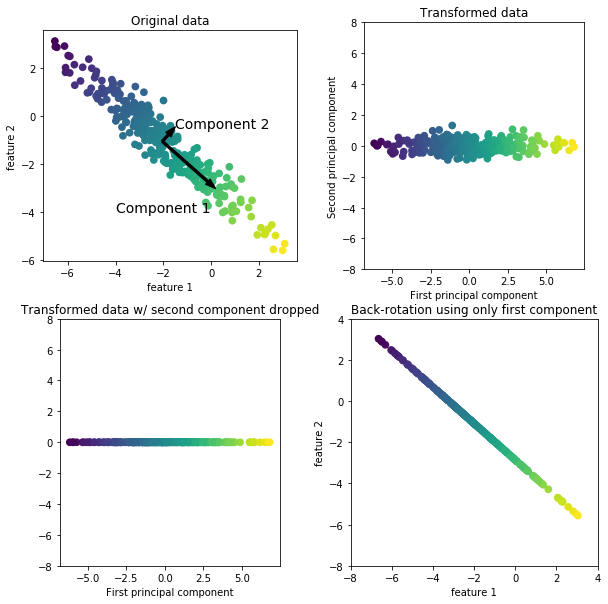

In [2]:
import mglearn
mglearn.plots.plot_pca_illustration()

##### The first plot (top left)

- shows the original data, colored to distinguish between them.
- The algorithm proceeds by first finding the direction of maximum variance, labeled, "Component 1".
- This is the direction (vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other.
- Then the algorithm finds the direction that contains the most information while being orthogonal (at right angle) to the first direction.
- For a classical 2D space, there can be only one orthogonal direction but it increases as the dimensions increases (like 3D and so on)
- Although these components are drawn as arrows, it doesn't really matter where the head and tail are.
- We could have drawn the first component from the center up to the top left instead of down to bottom right.
- The direction found using this process are called `principal components`, as they are the main directions of variance in the data.
- Generally, there can be many principal components as original features.

##### The second plot (top right)

- shows the same data, but now rotated so that the first principal component aligns with X-axis and the second principal component aligns with Y-axis.
- Before the rotation, **the mean was subtracted from the data, so that the transformed data is centered around zero**.
- In the rotated representation found by PCA, the 2 axes are uncorrelated, i.e., meaning that the correlation matrix of the data in this representation is 0 except for the diagonal.

- We can use PCA for dimensionality reduction by retaining only some of the principal components.
- Here, we might keep the first PC as shown in the 3rd panel. 
- This reduces the data from a 2D dataset to a 1D dataset.
- Note, however, that instead of keeping only 1 of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction (`component 1`) as the principal component.

- **Finally, we can undo the rotation by adding the mean back to the data**.
- This will resut in the data shown as in the last panel.
- These points are in the original feature space, but we kept only the information contained in the `1st Principal Component`.
- This transformation is sometimes used to remove noise effects from the data to visualize what part of the information is retained using the PCs.

##### Applying PCA to the cancer dataset for visualization

- One of the most common applications of PCA is visualizing the high-dimensional datasets.
- It is hard to create scatter plots of data that has more than 2 features.
- For the iris dataset, we were able to create a pair plot that gave us a partial picture of the data by showing us all the possible combinations of the 2 features.
- But if we want to look at the breast cancer dataset, even using a pair plot is tricky.
- This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots!
- We would never be able to look at all these plots in details, let alone try to understand them.

- There is an even simpler visualization we can use though - `computing histograms` of each of the features for the 2 classes, _benign_ and _malignant_ cancer.

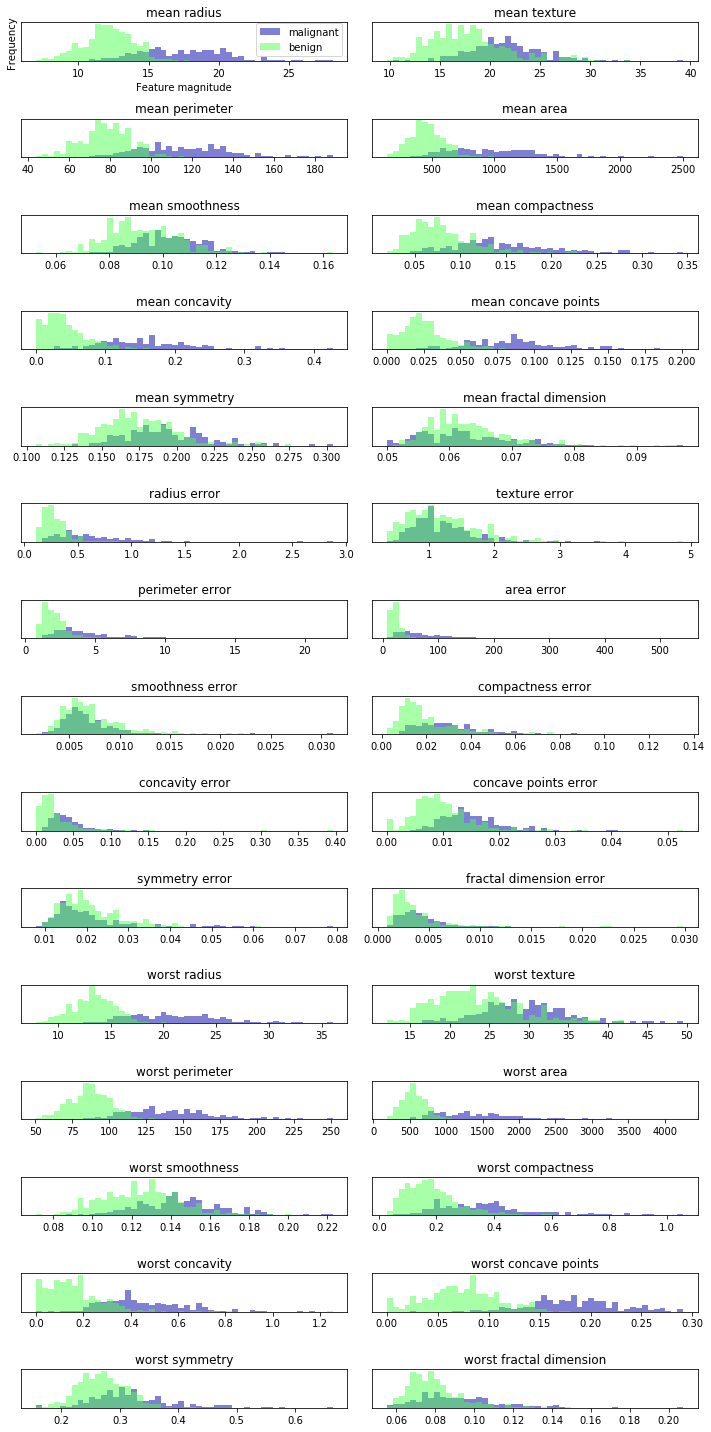

In [5]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

From the graphs above, 

- We create a histogram for each feature counting how often a data point appears with a feature in a certain range (_bin_)
- Each plot overlays 2 histograms one for all points in benign(green) and other for malignant (blue).
- This gives us some idea of how each feature is distributed across the 2 classes, and allows us to venture a guess as to which features are better at distinguishing them.
- For ex, "smoothness error" seems uninformative (as they overlap) whereas "worst concate points" seem more relevant as they have distinct bins.
- However, we still can't relate the variables and their classes.
- Using PCA, we can capture the main interactions and get a slightly more complete picture.
- We can find the first 2 PCs and visualize the data in a new 2D space with a single scatter plot.

Before we apply PCA, we scale our data so that each feature has unit variance by `StandardScaler`.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

- Learning the PCA transformations and applying it is as simple as applying any preprocessing transformations.
- We instantiate the PCA object, find the PCs by calling the fit() method and then apply the rotation and dimensionality reduction by calling transform() method.
- By default, PCA only rotates (and shifts) the data, but keeps all principal components.
- To reduce the dimensionality of data, we need to specify how many components we want to keep when creating the PCA object.

In [6]:
from sklearn.decomposition import PCA

#keep the first 2 PC of the data
pca = PCA(n_components=2)

#fit the model to breast cancer data
pca.fit(X_scaled)

#transform data onto the first 2 PCs
X_pca = pca.transform(X_scaled)
print (f"Original shape: {str(X_scaled.shape)}")
print (f"Reduced shape: {str(X_pca.shape)}")

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first 2 principal components

Text(0, 0.5, 'Second Principal Component')

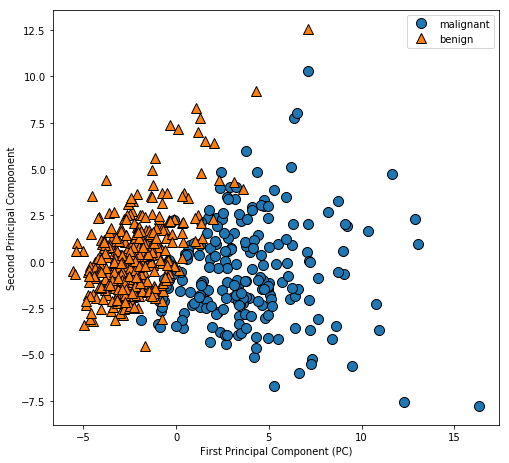

In [8]:
# plot first vs second PCs, colored by class
import mglearn
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component (PC)")
plt.ylabel("Second Principal Component")

- It is important to note that PCA is an unsupervised method, and doesn't use any class information when finding the rotation.
- It simply looks at the correlations in the data.
- For the scatter plot, we plotted the 1st PC against the 2nd PC and then used the class information to color the points.
- You can see the 2 classes separate quite well in this 2D space.
- This leads us to believe that even a linear classifier(even a line) could do a good job at distinguishing the 2 class.
- Also, the malignant points are more spread out that benign - something we could already see a bit from the above figure.

- A downside of PCA is that the 2 axes are often not very easy to interpret.
- The PCs correspond to directions in the original data, so they are combinations of original features.
- However, these combinations are usually very complex, as we'll see shortly.
- The PCs themselves are stored in components_ attribute of the PCA object during fitting:


In [9]:
print (f"PCA component shape : {pca.components_.shape}")

PCA component shape : (2, 30)


- Each row in components_ corresponds to one PC and they are sorted by their importance (the 1st comes 1st and so on).
- The columns correspond to original features attribute of PCA (here, its "mean radius" and "mean texture".

In [10]:
print (f"PCA Components : \n{pca.components_}")

PCA Components : 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map to make it easy for understanding

Text(0, 0.5, 'Principal Components')

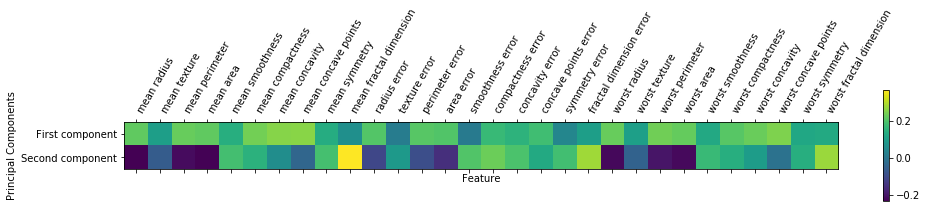

In [11]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()

plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")

- From the figure above, the 1st component, all features have the same sign (+ve) but as we mentioned already, it doesn't matter which directions the arrow points are in.
- Hence, there is a general correlation between all the features.
- As on measurement is high, the others are likely to be high as well.
- The second component has mixes signs, and both of the components involve all the 30 features.
- This is what making the explanation of the above figure tricky.

##### Eigenfaces for featue extraction

- Feature extraction :
    * The idea behind feature extraction is that its possible to find a representation of your data that is better suited for analysis than the raw representation given earlier.
    * Images are great example where feature extraction is helpful.
    * Images are made up of pixels usually stored as red, green and blue (RGB) intensities.
    * Objects in images are made up of thousands of pixels, and only together they are meaningful.
    * A simple application of feature extraction on images using PCA is by working with face images
    * Usually from labeled faces in the wild dataset.
    * This has images of faces downloaded from internet containing about celebrities, politicians, singers, actors and athletes from early 2000s.
    * We use gray scale version of those images, and scale them down for faster processing.
    * You can use some of the images below.

In [4]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
type(people)

sklearn.utils.Bunch

In [5]:
image_shape = people.images[0].shape

In [6]:
image_shape

(87, 65)

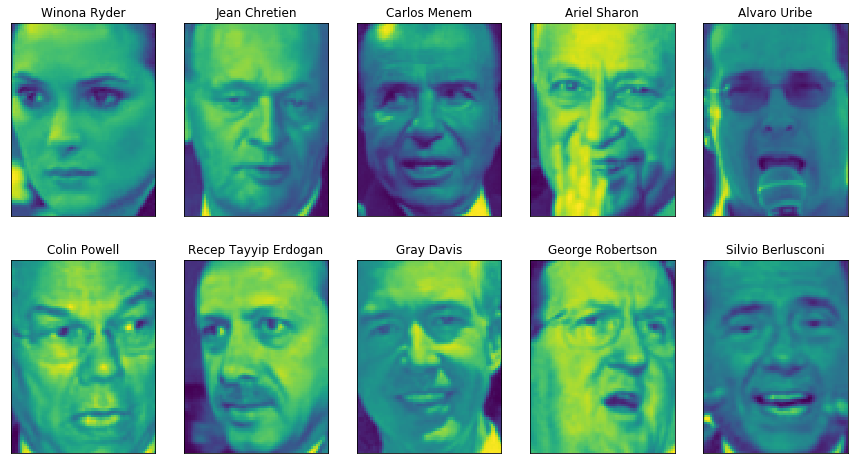

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 5, figsize=(15,8),
                         subplot_kw={'xticks': (), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [12]:
print (f"People images shape : {people.images.shape}")
print (f"Number of classes : {len(people.target_names)}")

People images shape : (3023, 87, 65)
Number of classes : 62


We can see this dataset is skewed containing lots of images of George W. Bush and Colin Powell 

In [14]:
# count how often each target appears
counts = np.bincount(people.target)

# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print ("{0:25} {1:3}".format(name, count), end = '    ')
    if (i + 1) % 3 == 0:
        print ()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


As we can see this is skewed dataset, we would make it less skew by only taking up to 50 images of each person (otherwise we would end up taking George W Bush - 530 times)

In [15]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
x_people = X_people / 255.

* A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database.
* This has applications in 
    - photo collections
    - social media
    - security applications
* One way to solve this problem would be to build a classifier where each person is a separate class.
* However, there are usually many different people in face datasets and very few images of the same person (few training examples per class).
* That makes it hard to train most classifiers.
* Additionally, you often want to add new people easily without needing to retrain a large model.
* A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying.
* This classifier could in principle work with only a single training example per class.
* Let's take a look at this,


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the train and test dataset

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print (f"The test score of 1-nn : {knn.score(X_test, y_test)}")

The test score of 1-nn : 0.23255813953488372


##### Summarizing the above :
